# AUTHOR : MOHAMMED UMAR

# GRIP @ The Sparks Foundation

# Task 2 : Prediction using Unsupervised ML

The task is to predict the optimum number of clusters from the given ‘Iris’ dataset
and represent it visually.

# Step 1 - Importing libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

import warnings as wg
wg.filterwarnings("ignore")

# Step 2 - Reading the Data 


In [23]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 3 - Visualising the Data

In [24]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
df.shape

(150, 4)

In [26]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Step 4 -  Finding the optimum number of clusters 

In [27]:
x = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Step 5 - Data Visualization 

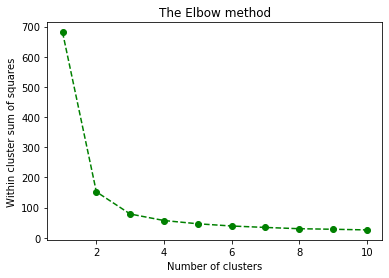

In [31]:
plt.plot(range(1, 11), wcss,'go--',color='green')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

# Step 6 - Visualising the clusters

In [32]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(df)

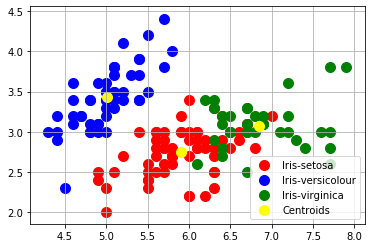

In [33]:
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.grid()
plt.show()

# Plotting the centroids of the clusters

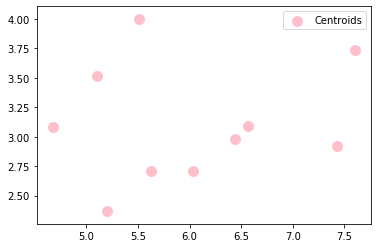

In [34]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'pink',label = 'Centroids')
plt.legend()